# Explore here

In [1]:
# Your code here
import pandas as pd


#URL of the Dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"

#Download and load the dataset into a Dataframe
data = pd.read_csv(url, delimiter=';')
print(data.head())

# Save the DataFrame to a local CSV file in the '../data/raw/' directory
data.to_csv('../data/raw/bank-marketing-campaign-data.csv', index=False)
print(f'File saved at: ../data/raw/bank-marketing-campaign-data.csv')

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [2]:
# Obtener las dimensiones
data.shape

(41188, 21)

In [ ]:
# Obtener información sobre tipos de datos y valores no nulos
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
data.drop(["pdays","day_of_week",], axis = 1, inplace = True)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


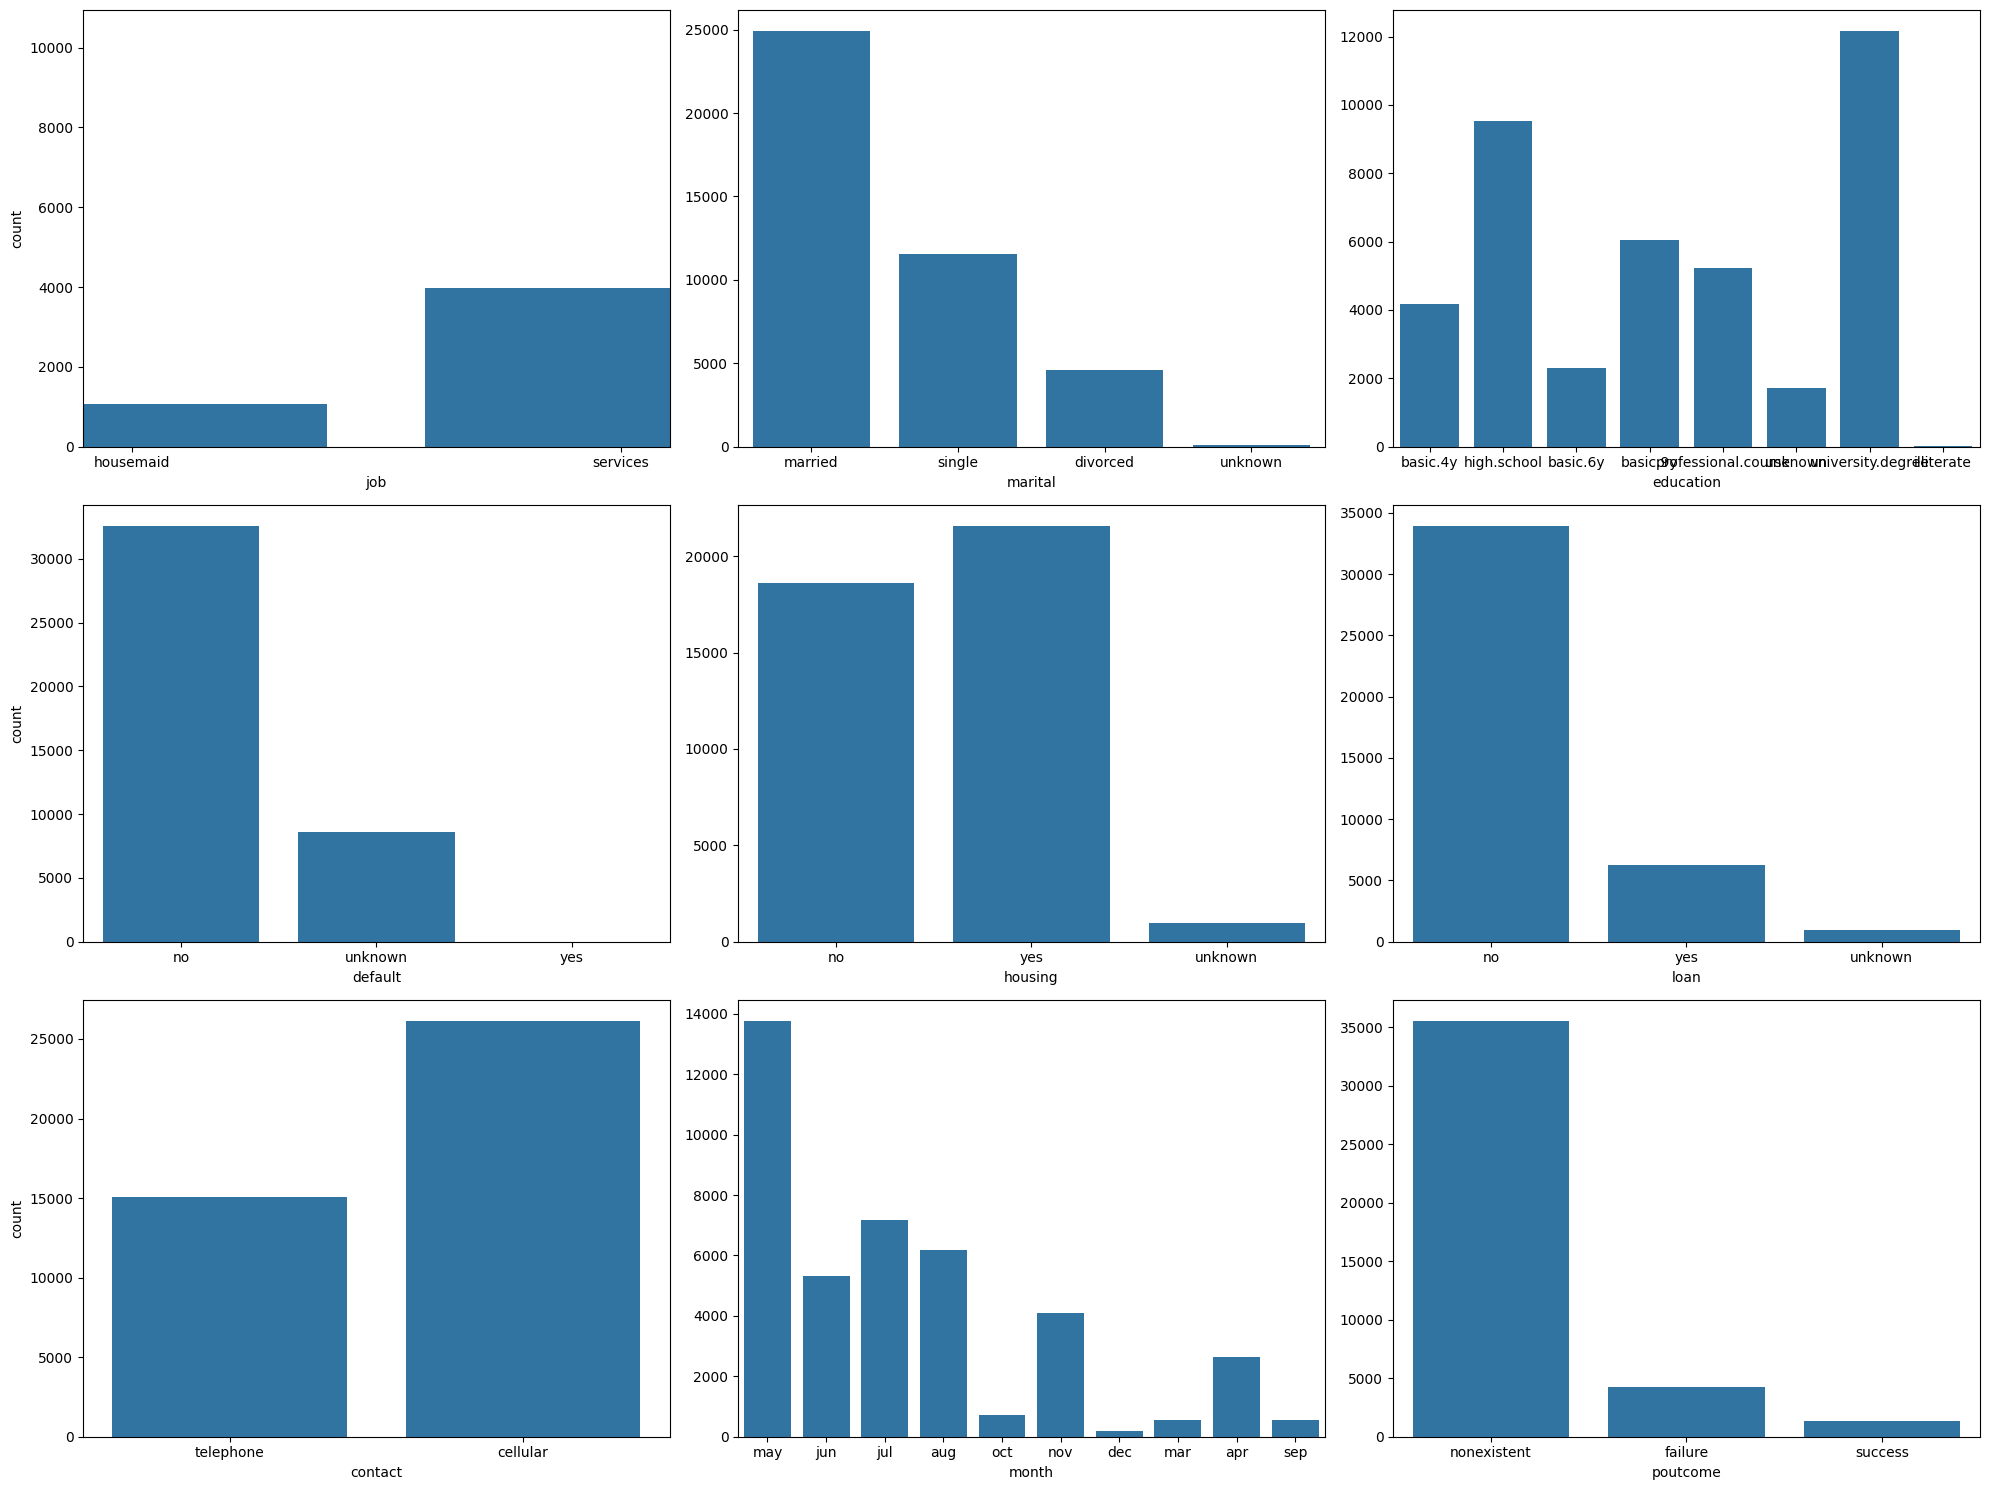

In [5]:
#Análisis variables categóricas
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, 3, figsize = (20, 15))

# Crear un histograma múltiple
sns.countplot(ax = axis[0, 0], data = data, x = "job").set_xlim(-0.1, 1.1)
sns.countplot(ax = axis[0, 1], data = data, x = "marital").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = data, x = "education").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = data, x = "default")
sns.countplot(ax = axis[1, 1], data = data, x = "housing").set(ylabel = None)
sns.countplot(ax = axis[1, 2], data = data, x = "loan").set(ylabel = None)
sns.countplot(ax = axis[2, 0], data = data, x = "contact")
sns.countplot(ax = axis[2, 1], data = data, x = "month").set(ylabel = None)
sns.countplot(ax = axis[2, 2], data = data, x = "poutcome").set(ylabel = None)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [6]:
print(data['job'].value_counts())

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


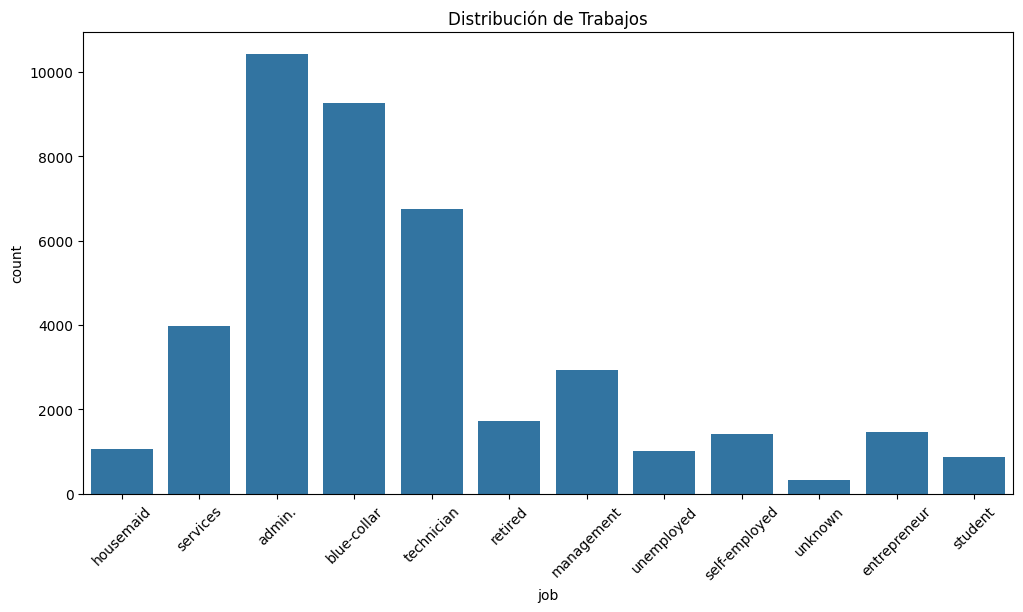

In [7]:

# Crear un gráfico de barras para la columna 'job'
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='job')
plt.title('Distribución de Trabajos')
plt.xticks(rotation=45)
plt.show()

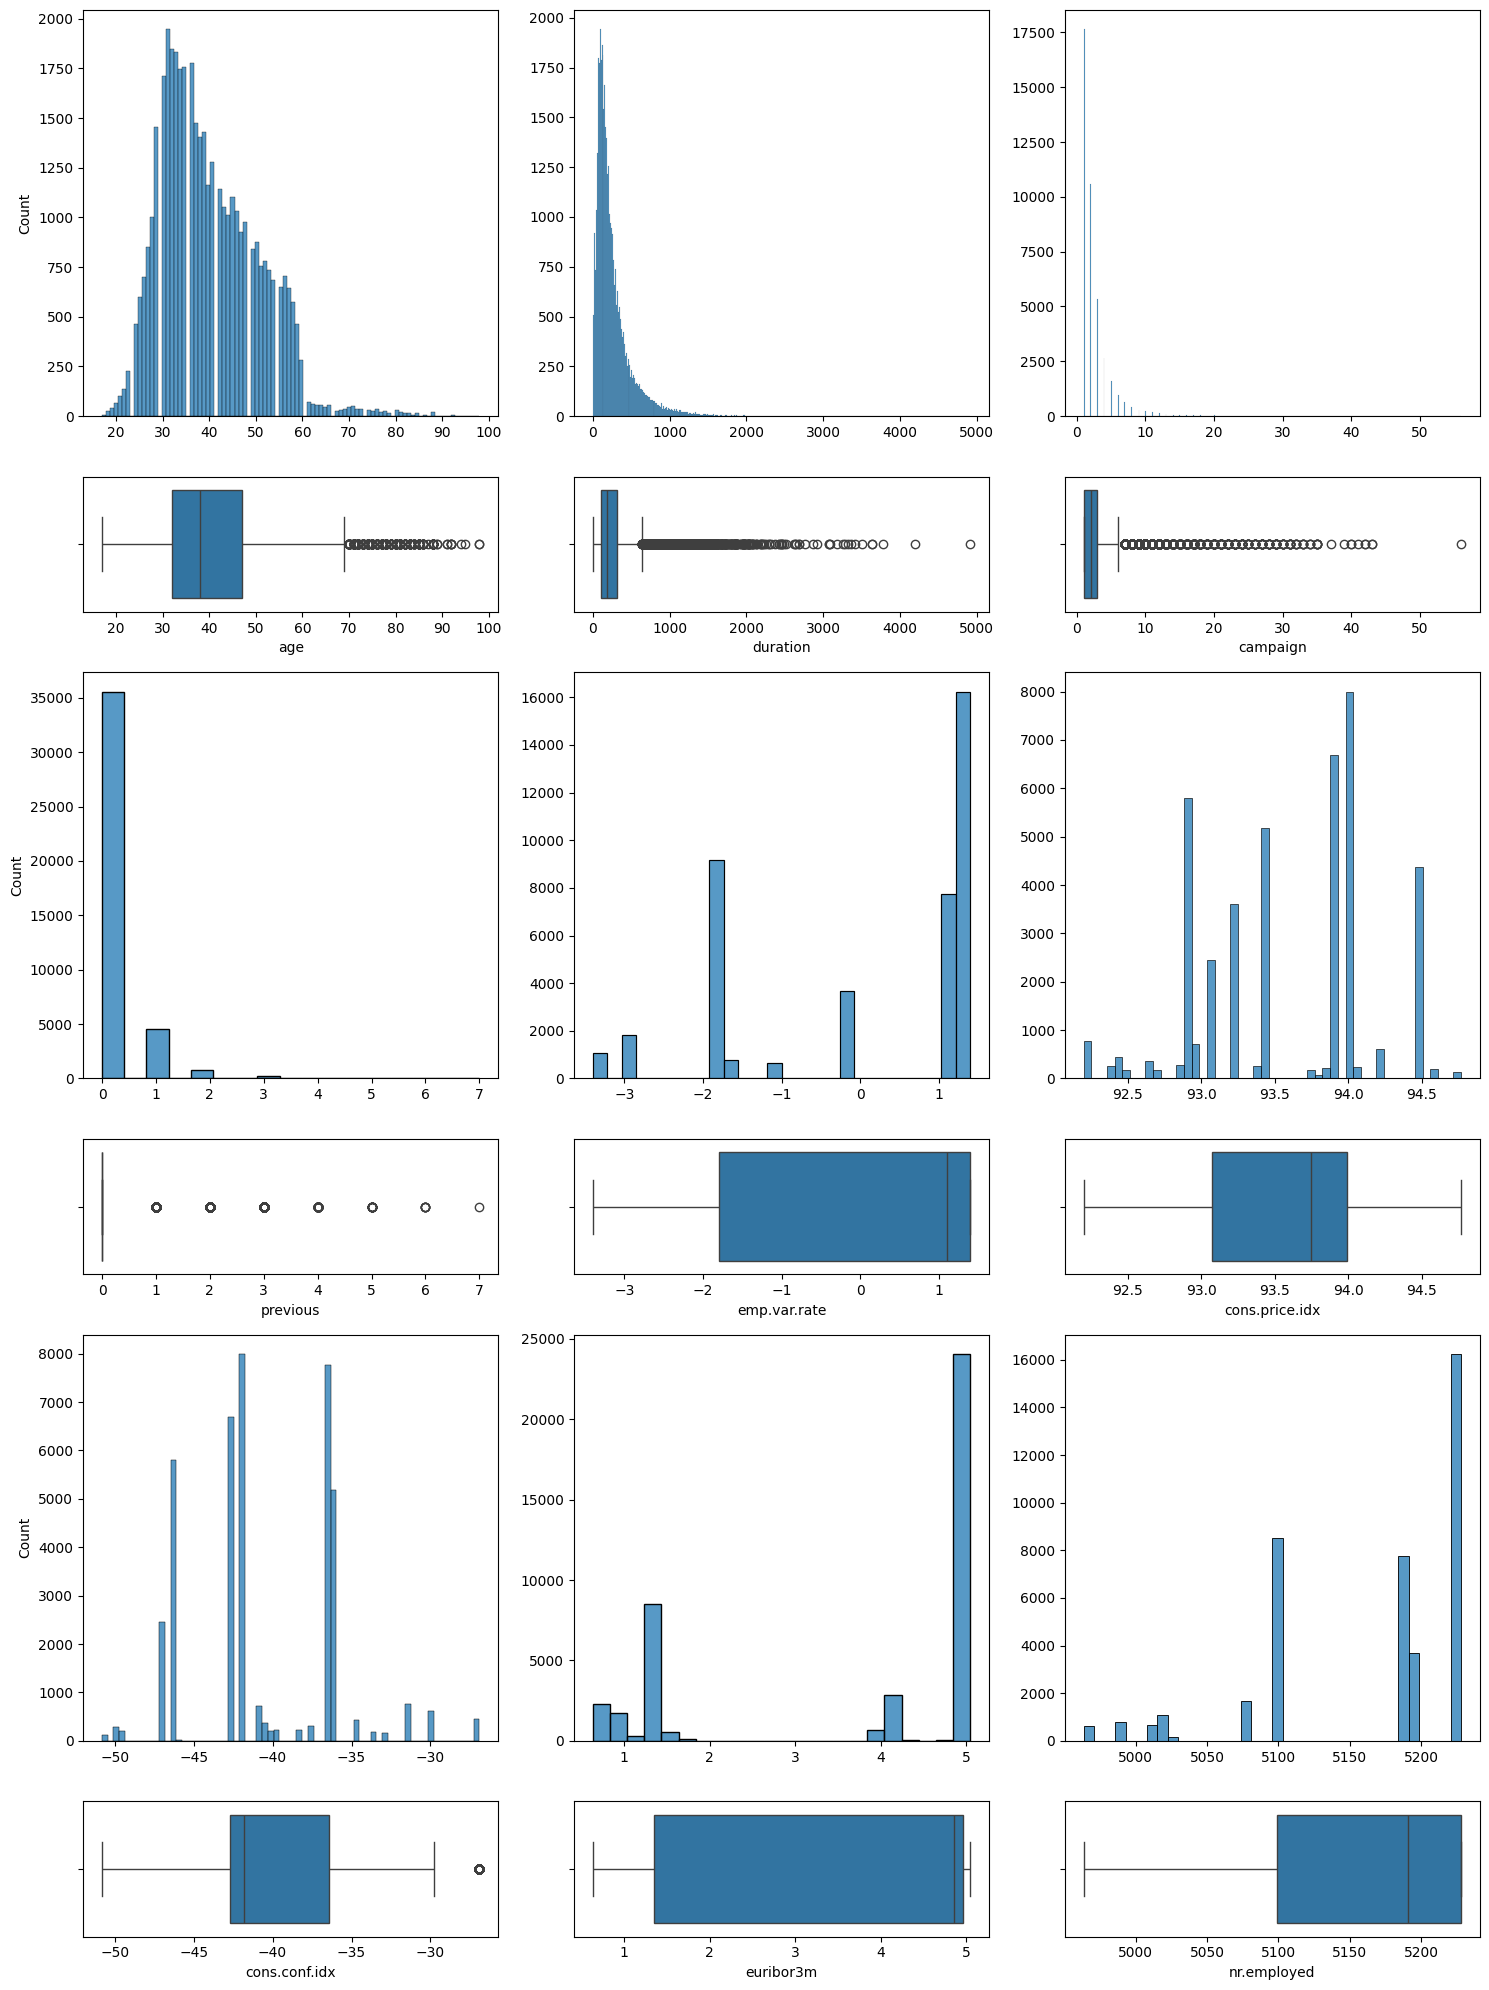

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(6, 3, figsize=(15, 20),gridspec_kw={'height_ratios': [3, 1, 3, 1, 3, 1]})

# Crear histogramas y diagramas de caja para cada variable numérica
sns.histplot(ax=axis[0, 0], data=data, x="age").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=data, x="age")
sns.histplot(ax=axis[0, 1], data=data, x="duration").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=data, x="duration")
sns.histplot(ax=axis[0, 2], data=data, x="campaign").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 2], data=data, x="campaign")
sns.histplot(ax=axis[2, 0], data=data, x="previous").set(xlabel=None)
sns.boxplot(ax=axis[3, 0], data=data, x="previous")
sns.histplot(ax=axis[2, 1], data=data, x="emp.var.rate").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 1], data=data, x="emp.var.rate")
sns.histplot(ax=axis[2, 2], data=data, x="cons.price.idx").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 2], data=data, x="cons.price.idx")
sns.histplot(ax=axis[4, 0], data=data, x="cons.conf.idx").set(xlabel=None)
sns.boxplot(ax=axis[5, 0], data=data, x="cons.conf.idx")
sns.histplot(ax=axis[4, 1], data=data, x="euribor3m").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[5, 1], data=data, x="euribor3m")
sns.histplot(ax=axis[4, 2], data=data, x="nr.employed").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[5, 2], data=data, x="nr.employed")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


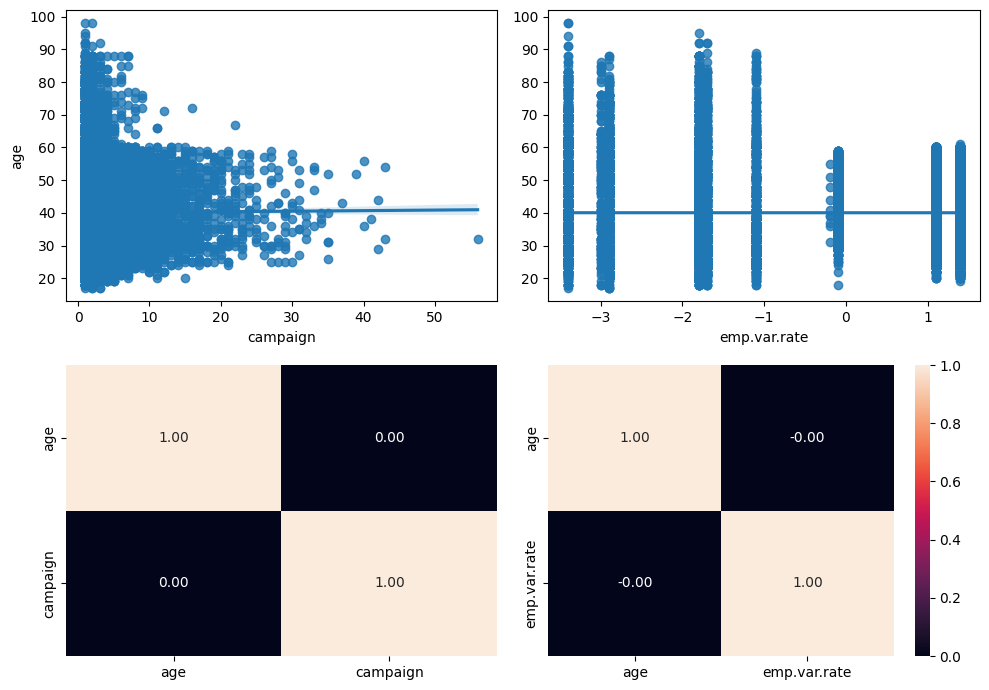

In [9]:
#Análisis de variables multivariante
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data, x = "campaign", y = "age")
sns.heatmap(data[["age", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data, x = "emp.var.rate", y = "age").set(ylabel=None)
sns.heatmap(data[["age", "emp.var.rate"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

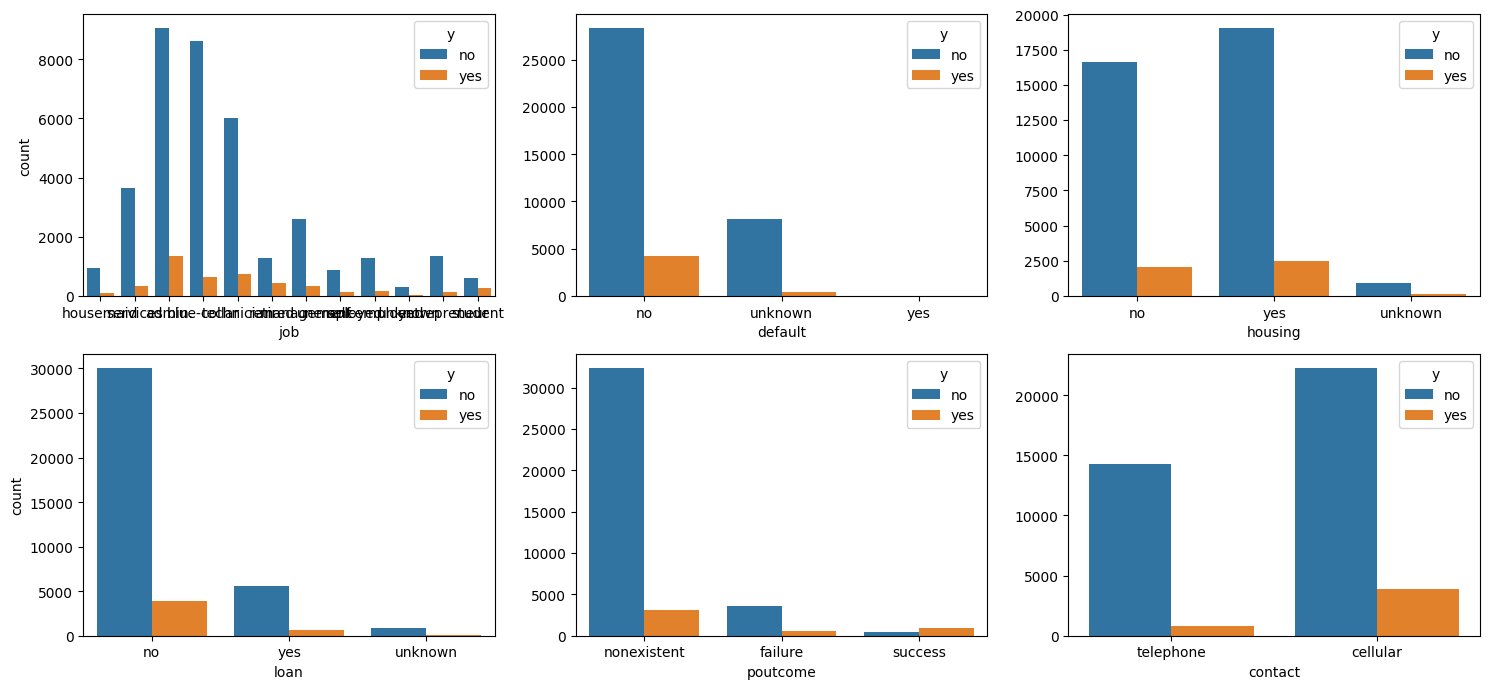

In [10]:
#analisis categorico-categorico
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = data, x = "job", hue = "y")
sns.countplot(ax = axis[0, 1], data = data, x = "default", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = data, x = "housing", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = data, x = "loan", hue = "y")
sns.countplot(ax = axis[1, 1], data = data, x = "poutcome", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 2], data = data, x = "contact", hue = "y").set(ylabel = None)

plt.tight_layout()


plt.show()

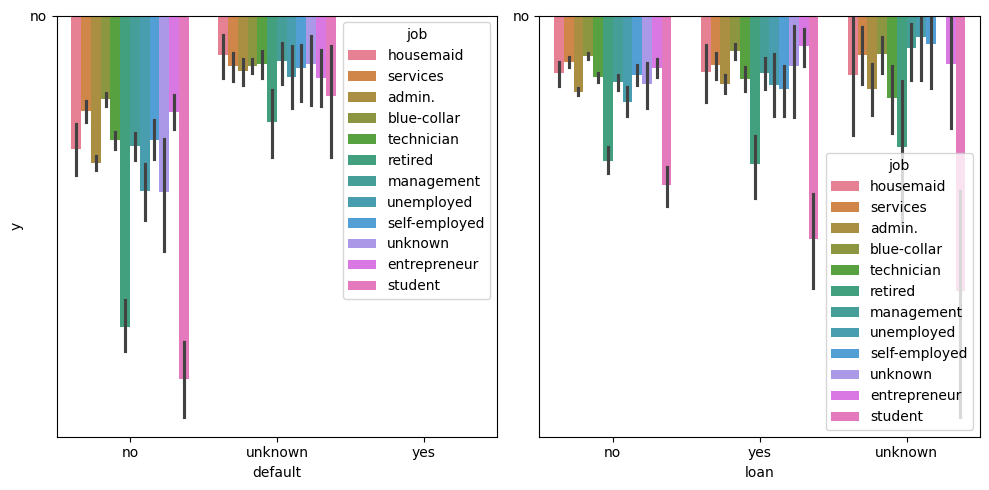

In [11]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = data, x = "default", y = "y", hue = "job")
sns.barplot(ax = axis[1], data = data, x = "loan", y = "y", hue = "job").set(ylabel = None)

plt.tight_layout()

plt.show()

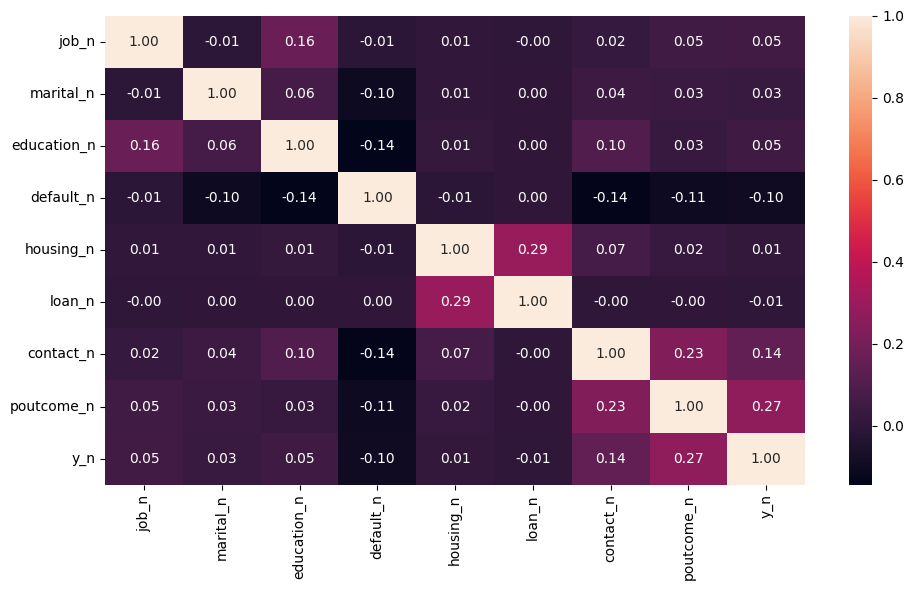

In [12]:
#Análisis de correclacciones
data["job_n"] = pd.factorize(data["job"])[0]
data["marital_n"] = pd.factorize(data["marital"])[0]
data["education_n"] = pd.factorize(data["education"])[0]
data["default_n"] = pd.factorize(data["default"])[0]
data["housing_n"] = pd.factorize(data["housing"])[0]
data["loan_n"] = pd.factorize(data["loan"])[0]
data["contact_n"] = pd.factorize(data["contact"])[0]
data["poutcome_n"] = pd.factorize(data["poutcome"])[0]

data["y_n"] = pd.factorize(data["y"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(data[["job_n", "marital_n", "education_n","default_n", "housing_n", "loan_n", "contact_n", "poutcome_n","y_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

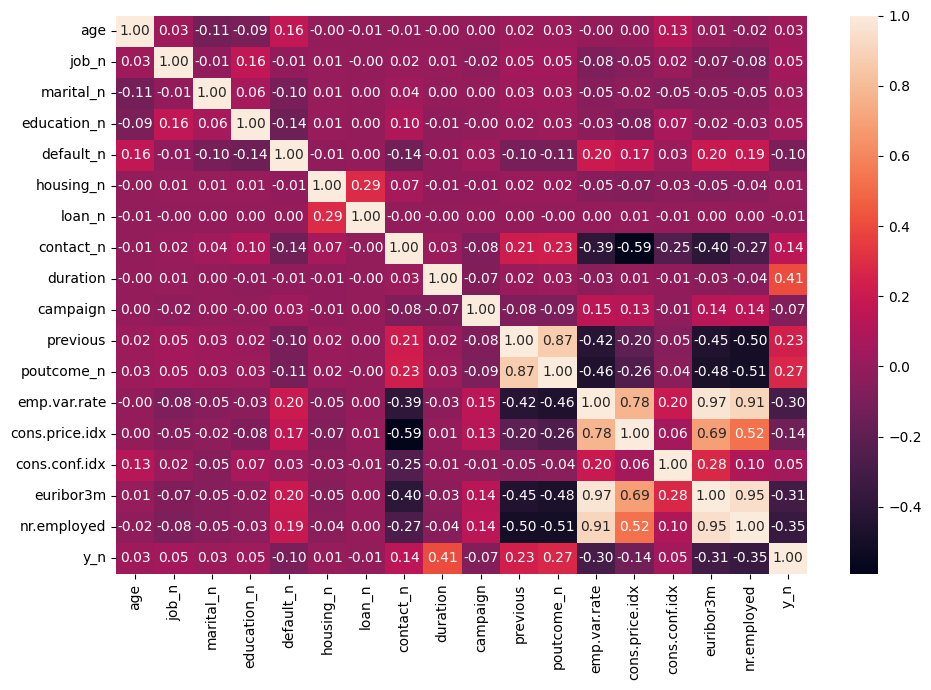

In [13]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(data[["age", "job_n", "marital_n", "education_n","default_n", "housing_n", "loan_n", "contact_n", "duration", "campaign", "previous", "poutcome_n","emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [ ]:
data.describe()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,poutcome_n,y_n
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,3.673691,0.510634,3.277532,0.208872,0.571914,0.199767,0.634748,0.169904,0.112654
std,10.42125,259.279249,2.770014,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,2.454116,0.696779,2.185525,0.406686,0.541209,0.456002,0.481507,0.455754,0.316173
min,17.00000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000


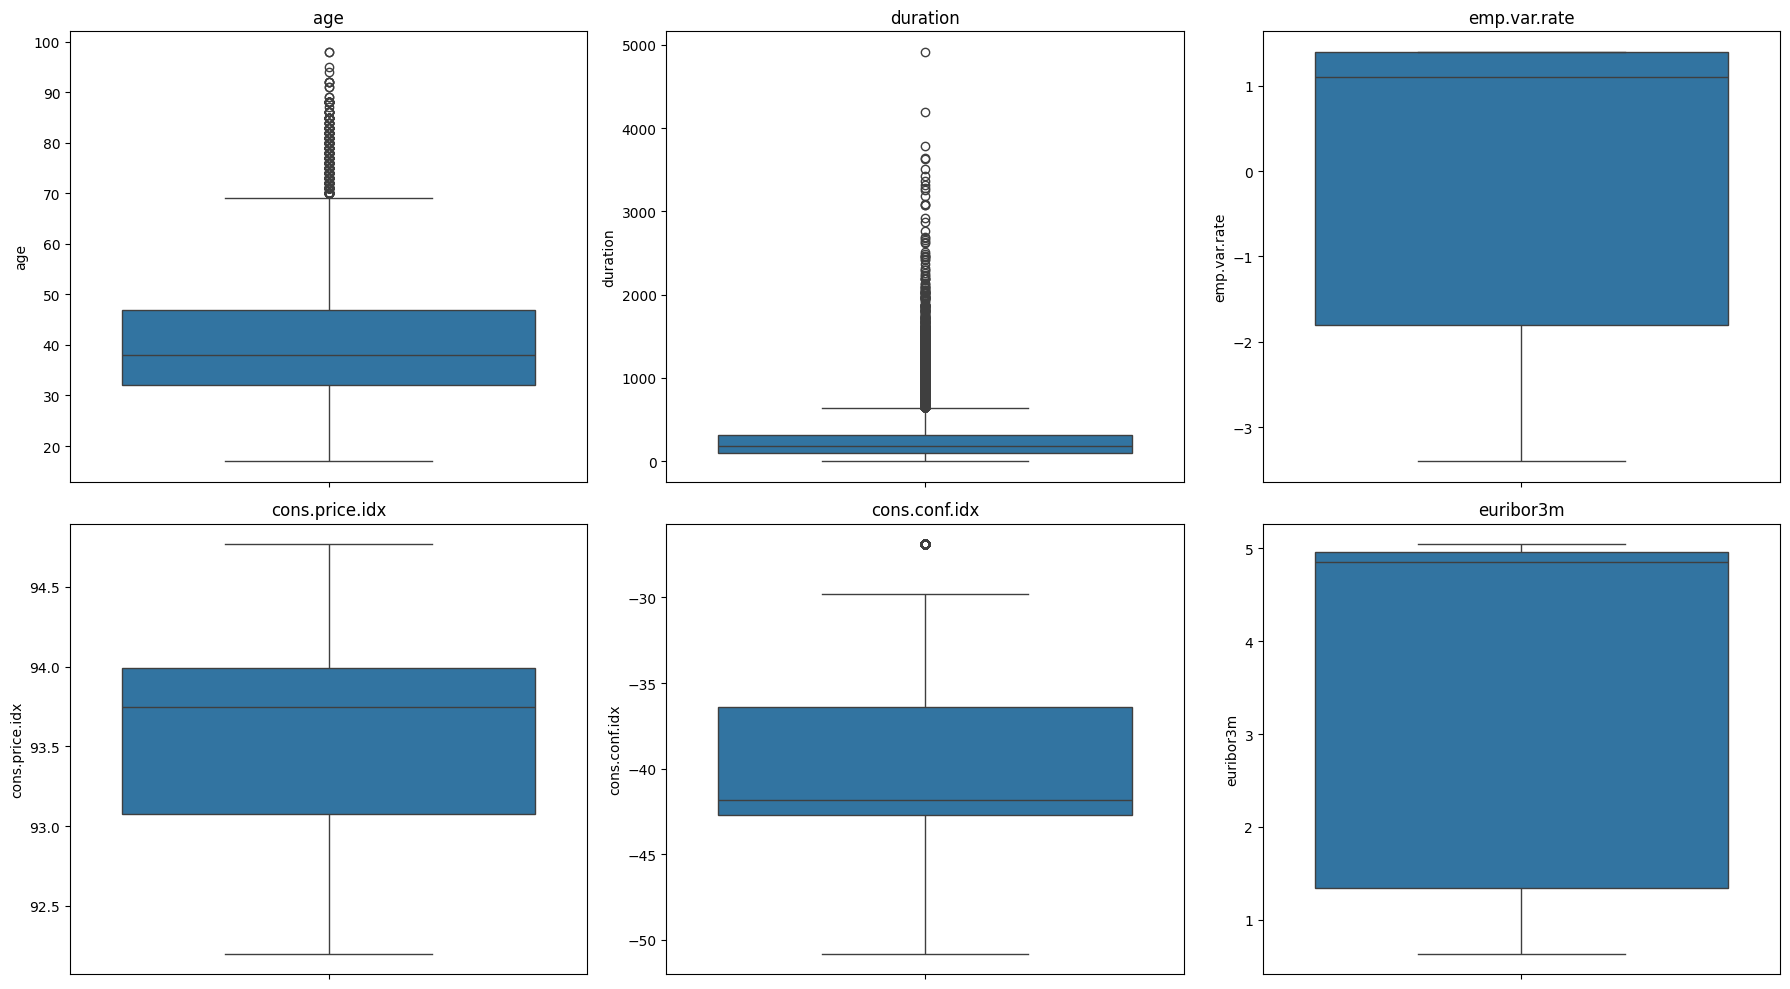

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables seleccionadas para los boxplots
variables = ["age", "duration", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]

# Crear un gráfico de cajas por cada variable, con un boxplot por gráfico
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # Dos filas y tres columnas para 6 gráficos
axes = axes.flatten()  # Aplanar la matriz de ejes para fácil acceso

# Generar un boxplot para cada variable
for i, var in enumerate(variables):
    sns.boxplot(data=data, y=var, ax=axes[i])
    axes[i].set_title(var)  # Agregar título con el nombre de la variable

# Ajustar diseño para evitar superposiciones
plt.tight_layout()
plt.show()


In [16]:
# Comprobar valores nulos y tipos de datos
print("Valores nulos por variable:\n")
print(data[variables].isnull().sum())

Valores nulos por variable:

age               0
duration          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
dtype: int64


In [17]:
print("Tipos de datos por variable:\n")
print(data[variables].dtypes)

Tipos de datos por variable:

age                 int64
duration            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
dtype: object


In [18]:
data.isnull().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
job_n             0
marital_n         0
education_n       0
default_n         0
housing_n         0
loan_n            0
contact_n         0
poutcome_n        0
y_n               0
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

# Definir las variables numéricas que se usarán para el entrenamiento
numerical_columns = [
    'age', 'duration', 'campaign', 'previous', 'emp.var.rate', 
    'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
    'job_n', 'loan_n', 'housing_n', 'default_n' # Incluir las variables factorizadas que consideras importantes
]

# Definir la variable objetivo (en este caso, y_n)
target_column = 'y_n'

# Definir las características (X) y la variable objetivo (y)
X = data[numerical_columns]  # Solo las variables numéricas escaladas
y = data[target_column]      # La variable objetivo

# Dividir los datos en train y test (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las primeras filas de X_train
X_train.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_n,loan_n,housing_n,default_n
12556,40,94,2,0,1.4,93.918,-42.7,4.960,5228.1,3,0,1,1
35451,31,116,4,0,-1.8,92.893,-46.2,1.244,5099.1,2,0,0,0
30592,59,13,6,1,-1.8,92.893,-46.2,1.354,5099.1,5,0,0,0
17914,43,94,5,0,1.4,93.918,-42.7,4.961,5228.1,0,0,1,0
3315,39,344,2,0,1.1,93.994,-36.4,4.860,5191.0,2,0,0,1


In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = numerical_columns)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = numerical_columns)

X_train_scal.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_n,loan_n,housing_n,default_n
12556,0.283951,0.019113,0.018182,0.000000,1.000000,0.669135,0.338912,0.980730,1.000000,0.272727,0.0,0.5,0.5
35451,0.172840,0.023587,0.054545,0.000000,0.333333,0.269680,0.192469,0.138291,0.512287,0.181818,0.0,0.0,0.0
30592,0.518519,0.002643,0.090909,0.142857,0.333333,0.269680,0.192469,0.163228,0.512287,0.454545,0.0,0.0,0.0
17914,0.320988,0.019113,0.072727,0.000000,1.000000,0.669135,0.338912,0.980957,1.000000,0.000000,0.0,0.5,0.0
3315,0.271605,0.069947,0.018182,0.000000,0.937500,0.698753,0.602510,0.958059,0.859735,0.181818,0.0,0.0,0.5


In [21]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 5 decimos implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,duration,previous,emp.var.rate,euribor3m,nr.employed
0,94.0,0.0,1.4,4.960,5228.1
1,116.0,0.0,-1.8,1.244,5099.1
2,13.0,1.0,-1.8,1.354,5099.1
3,94.0,0.0,1.4,4.961,5228.1
4,344.0,0.0,1.1,4.860,5191.0


In [23]:
#Inicialización y entrenamiento del modelo
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], shape=(8238,))

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9037387715464918

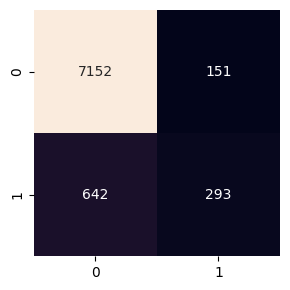

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

data = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(data)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV

# Definimos los parámetros que queremos ajustar a mano
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la cuadrícula
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [28]:
grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

/home/vscode/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: Convergen

Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [29]:
model_grid = LogisticRegression(penalty = "l2", C = 0.1, solver = "newton-cg")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.9065307113377034